# FML Challenge 1: Unsupervised Learning

 Team: Mohammed Dahbani, Laudereau Louis, Sam Ghyselen, Kela Wydie Nessesy, Ble Baka-Junior

#0 - Analysis

In [45]:
spotify_ds = pd.read_csv('/content/drive/MyDrive/Challenge 1/Livrable final/playlist_2010to2022.csv')
spotify_ds

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [46]:
spotify_ds.isnull().sum()

,0
playlist_url,0
year,0
track_id,0
track_name,0
track_popularity,0
album,0
artist_id,0
artist_name,0
artist_genres,0
artist_popularity,0


In [47]:
spotify_ds = spotify_ds.dropna()
spotify_ds.isnull().sum()

,0
playlist_url,0
year,0
track_id,0
track_name,0
track_popularity,0
album,0
artist_id,0
artist_name,0
artist_genres,0
artist_popularity,0


In [48]:
print(spotify_ds.shape)
spotify_ds = spotify_ds.drop_duplicates()
print(spotify_ds.shape)

(2299, 23)
(2299, 23)


Nombre d'artistes par playlist

<ipython-input-49-9ea09ee6b9e7>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


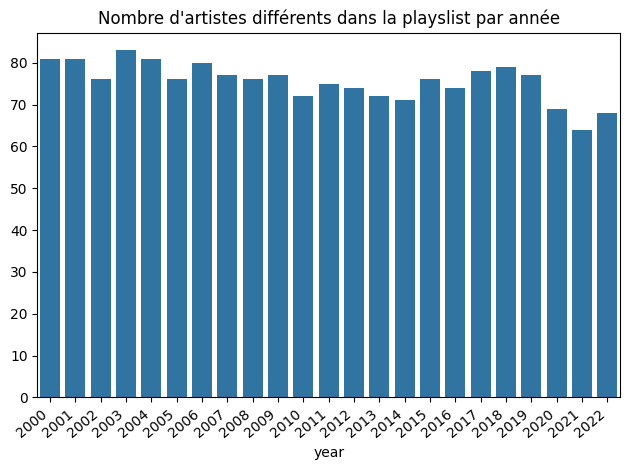

In [49]:
ax = sns.barplot(spotify_ds.groupby(['year'])['artist_id'].nunique())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Nombre d\'artistes différents dans la playslist par année')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

Artistes qui appraissent le plus

<ipython-input-50-b33ad7565bd0>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


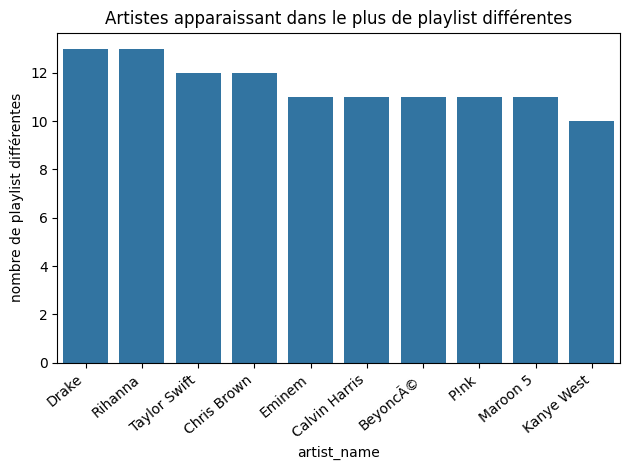

In [50]:
ax = sns.barplot(spotify_ds.groupby(['artist_name'])['playlist_url'].nunique().sort_values(ascending=False).head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Artistes apparaissant dans le plus de playlist différentes')
ax.set_ylabel('nombre de playlist différentes')
plt.tight_layout()
plt.show()

#2 -Musical features exploration


#### 1- Imports

In [51]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

### 2- Data visualisation


In [52]:
# Load the data
music= pd.read_csv("/content/drive/MyDrive/Challenge 1/Livrable final/playlist_2010to2022.csv")

music.head()


,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [53]:
# Statistical summary of the data
music.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Preprocessing

We select the 11 audio features

In [55]:
audio_features = music[['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
                        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [56]:
# Check for missing values in each column
missing_values = audio_features.isna().sum()

# Display columns that have missing values
print(missing_values[missing_values > 0])


danceability        1
energy              1
key                 1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
dtype: int64


In [57]:
audio_features = audio_features.fillna(audio_features.mean())  # Replace NaNs with the mean of the column

Since we have 11 dimensions, let's try reduce the using PCA for visualization.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(audio_features)
audio_features_scaled = scaler.transform(audio_features)

In [59]:
np.mean(audio_features, axis=0), np.var(audio_features, axis=0)

(danceability             0.660116
 energy                   0.693047
 key                      5.277947
 mode                     0.598521
 speechiness              0.097795
 acousticness             0.157689
 instrumentalness         0.013766
 liveness                 0.172618
 valence                  0.535110
 tempo                  120.512450
 duration_ms         226033.494128
 dtype: float64,
 danceability        1.990224e-02
 energy              2.714796e-02
 key                 1.315452e+01
 mode                2.401891e-01
 speechiness         8.538635e-03
 acousticness        4.151622e-02
 instrumentalness    7.048182e-03
 liveness            1.730869e-02
 valence             5.185708e-02
 tempo               7.620757e+02
 duration_ms         1.767814e+09
 dtype: float64)

In [60]:
np.mean(audio_features_scaled, axis=0), np.var(audio_features_scaled, axis=0)

(array([-5.99327351e-16,  7.78507693e-16, -2.89623398e-17,  1.54465812e-17,
        -1.05036752e-16,  4.94290599e-17, -1.85358975e-17,  8.34115385e-17,
         3.70717949e-16, -3.62994658e-16,  9.88581198e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

###  Initial Dimension Reduction using (PCA)

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA().fit(audio_features_scaled)

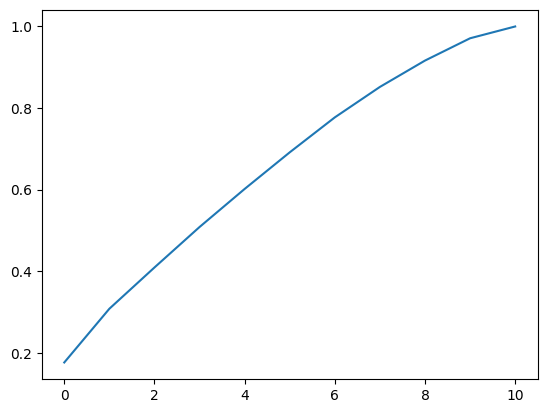

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#### Interpretation:

- The first part of the curve shows how the initial components capture a large proportion of the variance. For example, at around 3 components, we might have captured about 50% of the total variance.
- There’s usually a point called "elbow" of the curve where adding more components doesn't significantly increase the explained variance, and it's where we might consider stopping and using fewer components for dimensionality reduction.

#### Result:

- 9-10 components explain 90% of the variance, we might choose to reduce the dataset to those 9-10 components but this is still too many components and we wish we could reduce the dataset further!

### Correlation Matrix

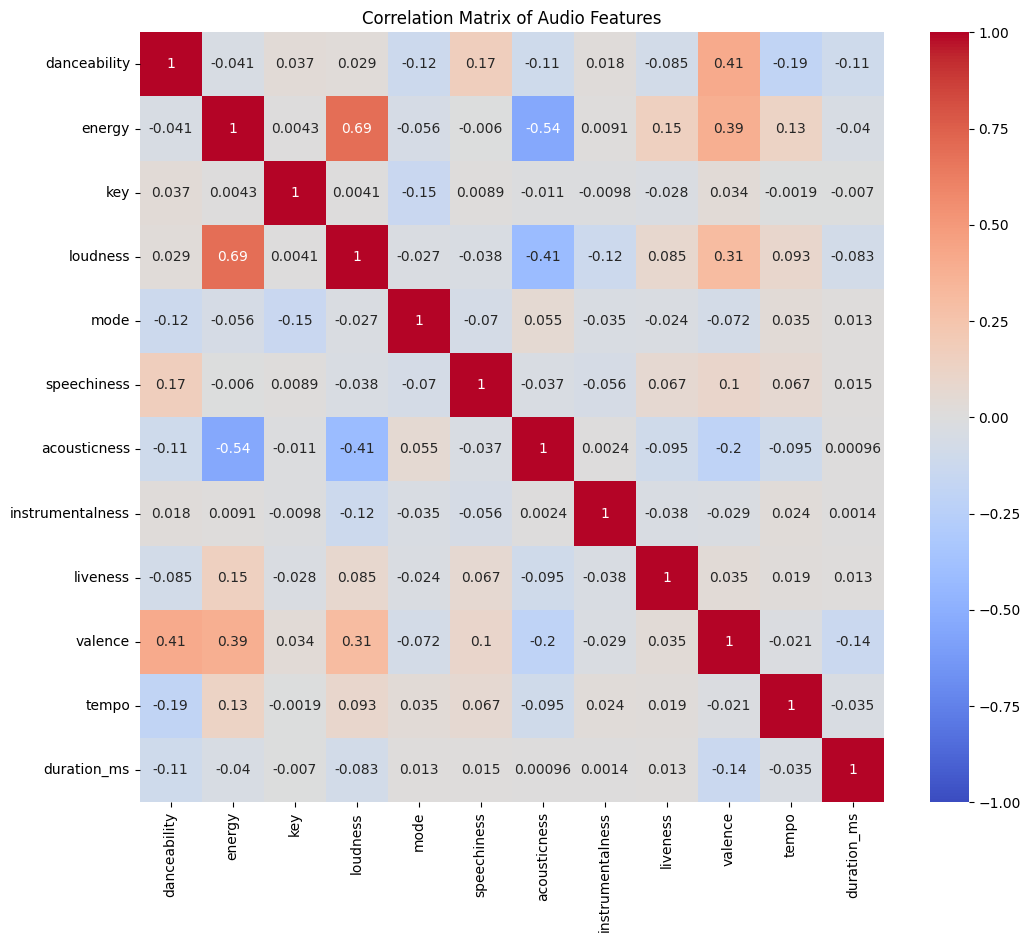

In [64]:
# Select the audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'duration_ms']

# Compute the correlation matrix
correlation_matrix = music[audio_features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Audio Features')
plt.show()

#### Highest Positive Correlations:

- Energy vs Loudness (0.69): These two features are highly positively correlated, meaning that louder tracks tend to be more energetic.
Danceability vs Valence (0.41): Tracks that are more danceable also tend to have higher valence, meaning they are perceived as more positive or happy.
- Energy vs Valence (0.39): There is a moderate positive correlation, meaning that higher energy levels are somewhat associated with happier music.

#### Highest Negative Correlations:
- Energy vs Acousticness (-0.54): There's a strong negative correlation between energy and acousticness, suggesting that more energetic tracks tend to be less acoustic, which makes sense since acoustic songs tend to be softer.
- Loudness vs Acousticness (-0.41): Loud tracks are generally less acoustic, reinforcing the previous relationship between energy and acousticness.

### Result:
- Features seems to have weak correlations with each others (max =0.69), suggesting it might capture a different aspect of music

Let consider trying alternative method such as t-SNE (t-distributed Stochastic Neighbor Embedding): A technique that we found particularly useful for visualization but less interpretable.

### Switching to t-SNE


#### 2D plot

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


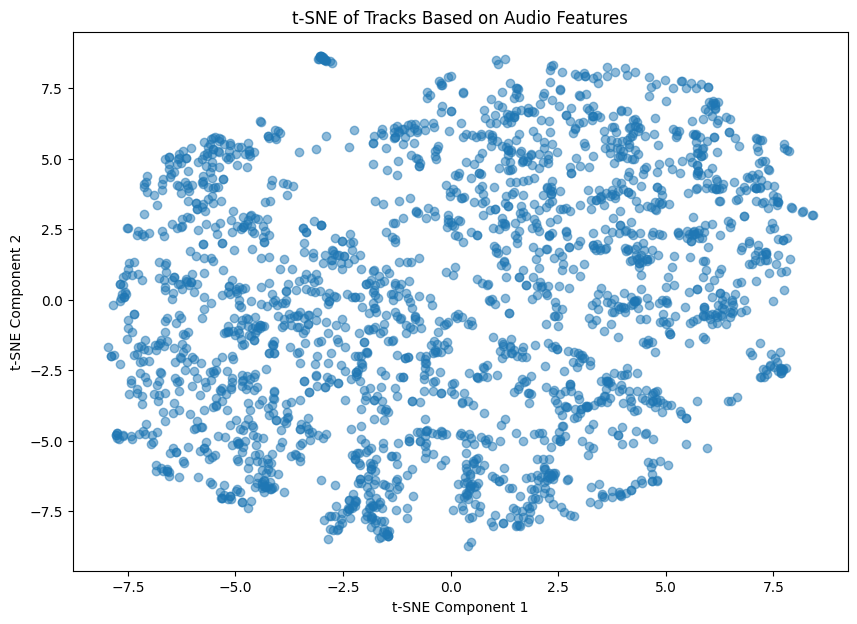

In [65]:
from sklearn.manifold import TSNE

# t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(audio_features_scaled)

# Visualize the 2D t-SNE result
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE of Tracks Based on Audio Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#### 3D plot

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


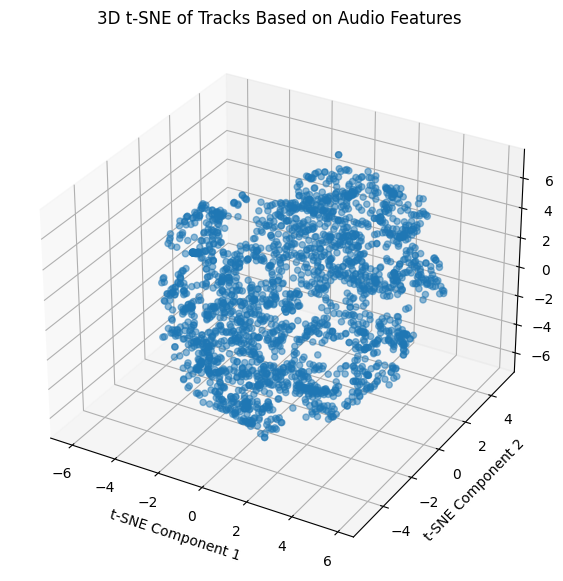

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# t-SNE to reduce dimensions to 3
tsne = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42)
tsne_result = tsne.fit_transform(audio_features_scaled)

# Visualize the 3D t-SNE result
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], alpha=0.5)
ax.set_title('3D t-SNE of Tracks Based on Audio Features')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()


This method also doesn’t provide clear results

## Representing Each Year by a Single Point + Clustering


### 1- PCA + K-means

Now let's represent each year by a single point after applying PCA, to do that we can calculate the average of the audio features for each year before applying PCA. This approach reduces the dimensionality for each year and allows us to represent each year as a single point in a 2D space.

In [76]:
# Select again the audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'duration_ms']

# Calculate the mean of audio features for each year
music_avg_per_year = music.groupby('year')[audio_features].mean()

# Fill the missing values
music_avg_per_year.fillna(music_avg_per_year.mean(), inplace=True)

# PCA

scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(music_avg_per_year)


pca = PCA()
pca_result = pca.fit_transform(audio_features_scaled)

pca_df = pd.DataFrame(pca_result[:,:2], columns=['PCA1', 'PCA2'], index=music_avg_per_year.index)


Text(0, 0.5, 'Contribution sommée')

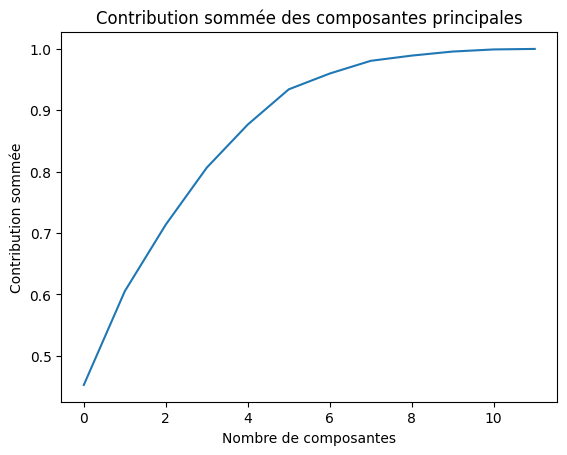

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Contribution sommée des composantes principales')
plt.xlabel('Nombre de composantes')
plt.ylabel('Contribution sommée')

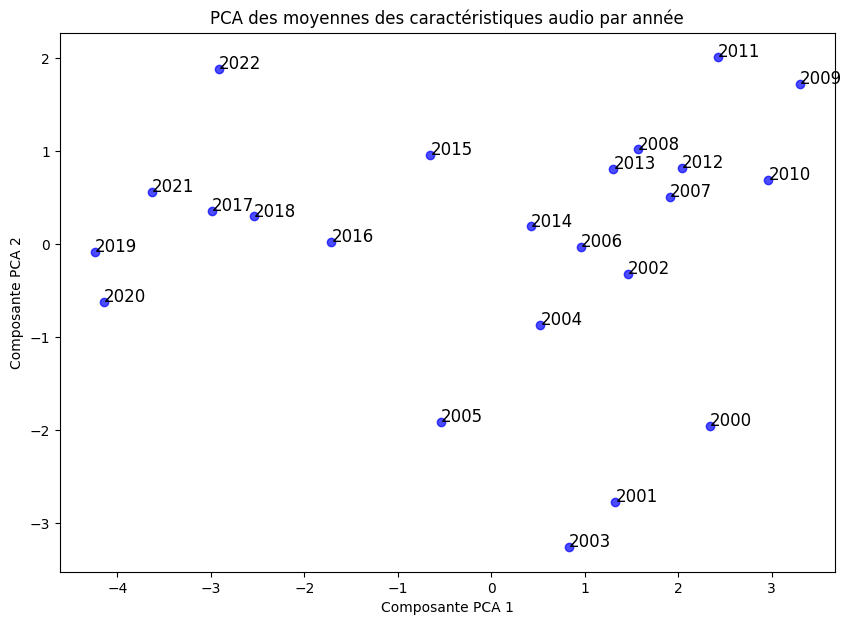

In [78]:
# Visualise PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], color='blue', alpha=0.7)

# Add labels for years
for year in pca_df.index:
    plt.text(pca_df.loc[year, 'PCA1'], pca_df.loc[year, 'PCA2'], str(year), fontsize=12)

plt.title("PCA des moyennes des caractéristiques audio par année")
plt.xlabel("Composante PCA 1")
plt.ylabel("Composante PCA 2")
plt.show()


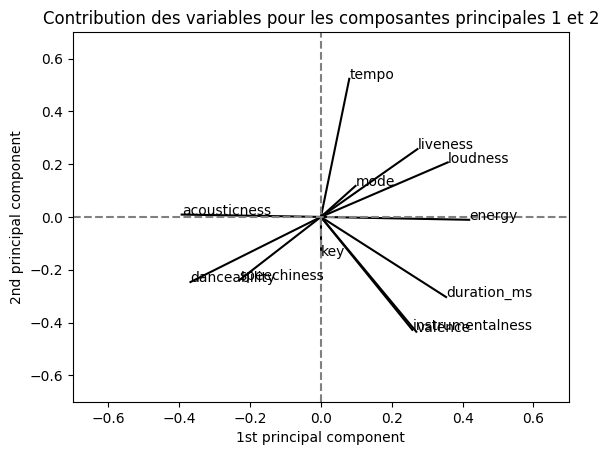

In [80]:
components = pca.components_

for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, audio_features[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.title('Contribution des variables pour les composantes principales 1 et 2')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);

Now let cluster the points using K-means.
We start by dertermining the optimal K using elbow method.

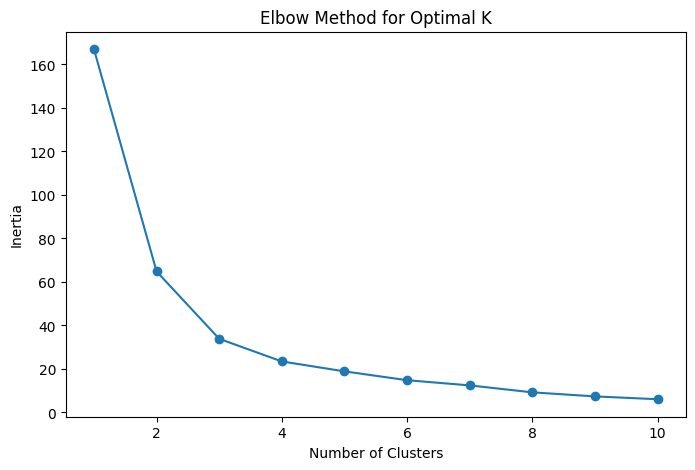

In [81]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=42,init='random')
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the inertia to find the elbow point
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The optimal K in this case appears obviousely to be 4.

In [82]:
from sklearn.cluster import KMeans

# Définir le nombre de clusters
n_clusters = 4

# Compute K-Means on PCA results
kmeans = KMeans(n_clusters=n_clusters, n_init=40,init='random')
clusters = kmeans.fit_predict(pca_df)

pca_df['Cluster'] = clusters


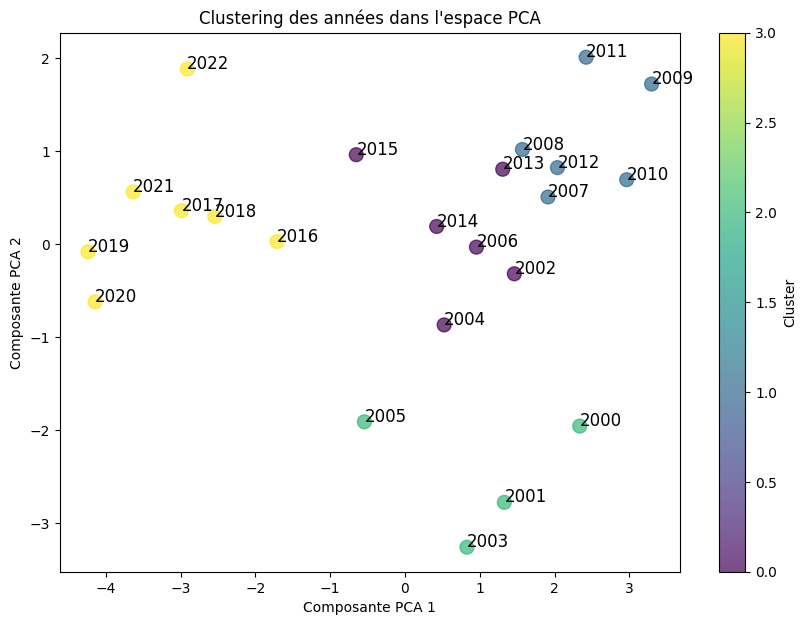

In [83]:
# Visualise clusters
plt.figure(figsize=(10, 7))

# Scatter plot
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7)

# Add labels for years
for year in pca_df.index:
    plt.text(pca_df.loc[year, 'PCA1'], pca_df.loc[year, 'PCA2'], str(year), fontsize=12)

plt.title("Clustering des années dans l'espace PCA")
plt.xlabel("Composante PCA 1")
plt.ylabel("Composante PCA 2")
plt.colorbar(label='Cluster')
plt.show()


In [84]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9, 10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=100).fit(pca_df) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(pca_df, cluster_labels) # Corresponding silhouette score

    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5595445341515386
For n = 3 Silhouette_score: 0.5618317457316424
For n = 4 Silhouette_score: 0.5300328822196065
For n = 5 Silhouette_score: 0.42697295958693676
For n = 6 Silhouette_score: 0.39497943978908584
For n = 7 Silhouette_score: 0.3666588167703715
For n = 8 Silhouette_score: 0.33259964610678916
For n = 9 Silhouette_score: 0.34183285608539377
For n = 10 Silhouette_score: 0.3355940958083005


For n=4, the silhouette score is 0.53.

### 2- T-SNE + Clustering

In [85]:
from sklearn.manifold import TSNE
# Select again the audio features
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'duration_ms']

# Calculate the mean of audio features for each year
music_avg_per_year = music.groupby('year')[audio_features].mean()

# Fill the missing values
music_avg_per_year.fillna(music_avg_per_year.mean(), inplace=True)

# T-SNE

scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(music_avg_per_year)

# t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(audio_features_scaled)



In [86]:
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'], index=music_avg_per_year.index)

In [87]:
!pip install adjustText

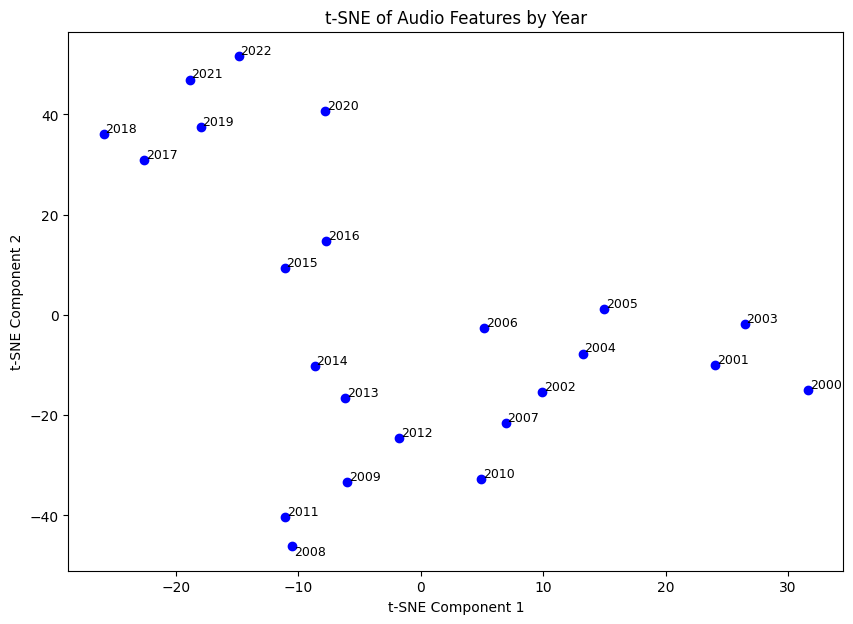

In [88]:
from adjustText import adjust_text

# Create the t-SNE plot
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='blue')

year_labels = tsne_df.index.values
# Add labels
texts = []
for i, year in enumerate(year_labels):
    texts.append(plt.text(tsne_result[i, 0], tsne_result[i, 1], str(year), fontsize=9))

# Adjust labels
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

# Title and labels
plt.title('t-SNE of Audio Features by Year')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()


Now let cluster the points using K-means.
We start by dertermining the optimal K using elbow method.

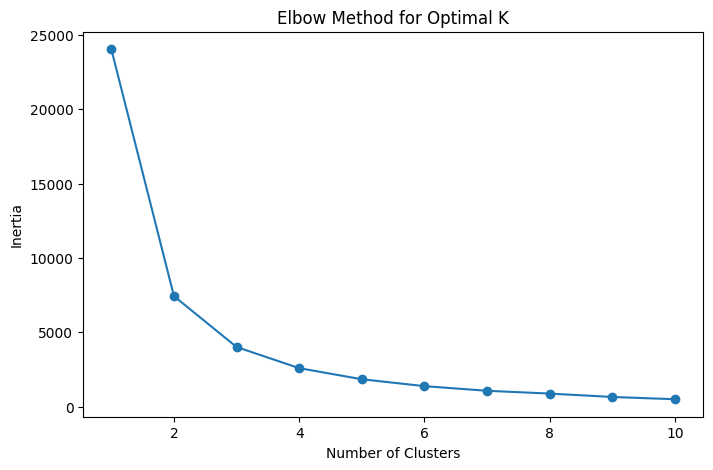

In [89]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=42,init='random')
    kmeans.fit(tsne_df)
    inertia.append(kmeans.inertia_)

# Plot the inertia to find the elbow point
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The optimal K is 4.

In [90]:
from sklearn.cluster import KMeans

# Définir le nombre de clusters
n_clusters = 4

# Compute K-Means on PCA results
kmeans = KMeans(n_clusters=n_clusters, n_init=10,init='random')
clusters = kmeans.fit_predict(tsne_df)

tsne_df['Cluster'] = clusters


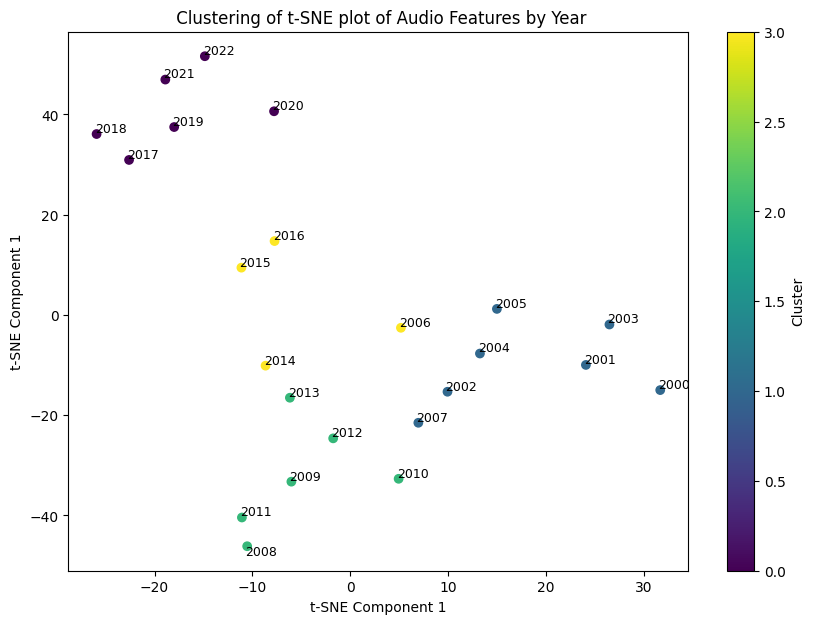

In [91]:
from adjustText import adjust_text

# Create the t-SNE plot
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=tsne_df['Cluster'])

year_labels = tsne_df.index.values
# Add labels
texts = []
for i, year in enumerate(year_labels):
    texts.append(plt.text(tsne_result[i, 0], tsne_result[i, 1], str(year), fontsize=9))

# Adjust labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

plt.title(" Clustering of t-SNE plot of Audio Features by Year")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 1")
plt.colorbar(label='Cluster')
plt.show()

In [92]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9, 10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=100).fit(tsne_df) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(tsne_df, cluster_labels) # Corresponding silhouette score

    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.580863659452499
For n = 3 Silhouette_score: 0.4969406368158429
For n = 4 Silhouette_score: 0.4713449671920945
For n = 5 Silhouette_score: 0.44689742293100976
For n = 6 Silhouette_score: 0.43740766491147237
For n = 7 Silhouette_score: 0.4622565519835845
For n = 8 Silhouette_score: 0.419921294398004
For n = 9 Silhouette_score: 0.43823928221353453
For n = 10 Silhouette_score: 0.4388901744754528


For n=4, the silhouette score is 0.47.

#### Comment:

The groupings seem to reveal distinct musical phases over the years, with each cluster capturing a particular period in terms of production trends, popular genres, or technologies used. For example, the more recent years (post-2016) are grouped into a single cluster, suggesting that the musical characteristics of songs from this period are fairly homogeneous. This could reflect the standardization of recent music production, influenced by digital tools, the globalization of musical styles, and other factors.


#3 - Grouping the artist by their genre

In [93]:
from ast import literal_eval

In [95]:
spotify_ds = pd.read_csv('playlist_2010to2022.csv')

spotify_ds = spotify_ds.dropna()

<h3>Data set preparation<h3>

We reduce the number of variables to keep:
- artist name
- artist genre

In [96]:
artist_spotify_ds = spotify_ds[['artist_name','artist_genres']].drop_duplicates()
artist_spotify_ds.head()

,artist_name,artist_genres
0,Coldplay,"['permanent wave', 'pop']"
1,blink-182,"['alternative metal', 'modern rock', 'pop punk..."
2,Faith Hill,"['contemporary country', 'country', 'country d..."
3,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge..."
4,*NSYNC,"['boy band', 'dance pop', 'pop']"


We explode the artist_genres lists

In [97]:
artist_cov_spotify_ds = artist_spotify_ds.copy()
artist_cov_spotify_ds['artist_genres'] = artist_cov_spotify_ds['artist_genres'].apply(literal_eval) #convert to list type
artist_cov_spotify_ds = artist_cov_spotify_ds.explode('artist_genres')
artist_cov_spotify_ds

,artist_name,artist_genres
0,Coldplay,permanent wave
0,Coldplay,pop
1,blink-182,alternative metal
1,blink-182,modern rock
1,blink-182,pop punk
...,...,...
2297,Central Cee,melodic drill
2298,Gunna,atl hip hop
2298,Gunna,melodic rap
2298,Gunna,rap


We then one-hot encodes the dataset

In [98]:
artist_cov_spotify_ds = pd.get_dummies(artist_cov_spotify_ds, columns=['artist_genres'])
artist_cov_spotify_ds = artist_cov_spotify_ds.groupby(['artist_name']).sum()
artist_cov_spotify_ds.columns = artist_cov_spotify_ds.columns.str.slice(start=14)
artist_cov_spotify_ds

,acid house,acoustic pop,adult standards,afro r&b,afrobeats,afrofuturism,album rock,alt z,alternative dance,alternative hip hop,...,viral rap,viral trap,virgin islands reggae,virginia hip hop,vocal house,vocal jazz,washington indie,welsh rock,west coast rap,wrestling
artist_name,,,,,,,,,,,,,,,,,,,,,
*NSYNC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2 Chainz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21 Savage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24kGoldn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
girl in red,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
iann dior,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
iio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [99]:
X_cov = artist_cov_spotify_ds.reset_index().values

Correlation matrix

In [100]:
cov_genre = np.dot(X_cov[:,1:].T, X_cov[:,1:]) / X_cov[:,1:].shape[0]
cov_genre.shape

(437, 437)

We keep the most important genre :
- Pop
- RnB
- Rap
- Rock
- EDM

By associating the other with the one with wich they have they highest correlation

In [101]:
g_genre = ['pop', 'r&b', 'rap', 'rock', 'edm']
i_genre = [artist_cov_spotify_ds.columns.get_loc(genre) for genre in g_genre]
cov_genre = cov_genre[:,i_genre]
cov_genre_corr = {artist_cov_spotify_ds.columns[i] : g_genre[np.argmax(cov_genre[i])] for i in range(len(artist_cov_spotify_ds.columns))}

We get the database and we replace all genre by their family genre

In [102]:
artist_spotify_ds['artist_genres'] = artist_spotify_ds['artist_genres'].apply(literal_eval) #convert to list type
artist_spotify_ds = artist_spotify_ds.explode('artist_genres')
artist_spotify_ds = artist_spotify_ds.replace(cov_genre_corr).drop_duplicates()
artist_spotify_ds

,artist_name,artist_genres
0,Coldplay,rock
0,Coldplay,pop
1,blink-182,rock
2,Faith Hill,pop
3,Linkin Park,rock
...,...,...
2291,Manuel Turizo,rap
2292,Stephen Sanchez,pop
2296,Latto,pop
2297,Central Cee,pop


We one-hot encode the dataset

In [103]:
artist_spotify_ds = pd.get_dummies(artist_spotify_ds, columns=['artist_genres'])
artist_spotify_ds = artist_spotify_ds.groupby(['artist_name']).sum()
artist_spotify_ds.columns = artist_spotify_ds.columns.str.slice(start=14)
artist_spotify_ds

,edm,pop,r&b,rap,rock
artist_name,,,,,
*NSYNC,0,1,0,0,0
112,0,1,1,1,0
2 Chainz,0,0,0,1,0
21 Savage,0,0,0,1,0
24kGoldn,0,0,0,1,0
...,...,...,...,...,...
girl in red,0,1,0,0,0
iann dior,0,0,0,1,0
iio,0,1,0,0,0


In [104]:
X = artist_spotify_ds.copy()

<h3>Dimensions reduction<h3>

We use MCA, we have more than 2 categorical data

In [106]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 5.2 MB/s eta 0:00:00


In [107]:
import prince

In [108]:
mca = prince.MCA(
    n_components=5,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=100
)
mca = mca.fit(X)

In [109]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.330,32.97%,32.97%
1,0.227,22.66%,55.63%
2,0.211,21.07%,76.70%
3,0.148,14.81%,91.52%
4,0.085,8.48%,100.00%


<h2>Results<h2>

In [110]:
mca.plot(
    X,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=True,
    show_row_labels=False
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

# 4 - Artists clusters

## Import libraries

In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

from sklearn.preprocessing import scale

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

## Read data

In [113]:
playlist_data = pd.read_csv('playlist_2010to2022.csv')
playlist_data.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [114]:
list(playlist_data.columns)

['playlist_url',
 'year',
 'track_id',
 'track_name',
 'track_popularity',
 'album',
 'artist_id',
 'artist_name',
 'artist_genres',
 'artist_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [115]:
playlist_data.dtypes

,0
playlist_url,object
year,int64
track_id,object
track_name,object
track_popularity,int64
album,object
artist_id,object
artist_name,object
artist_genres,object
artist_popularity,int64


In [116]:
playlist_data.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


playlist start in 2000 and not 2010

In [117]:
playlist_data.dropna()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [118]:
tidy_playlist = playlist_data.copy()  # copy dataframe to avoid modifications on the original dataframe
tidy_playlist = tidy_playlist.dropna()
tidy_playlist.drop(columns=['year','track_id','playlist_url','track_name','album','artist_id','artist_name','artist_genres'],inplace=True)

In [119]:
np.isinf(tidy_playlist).values.sum()

0

## Visualizations

<Axes: xlabel='time_signature', ylabel='Count'>

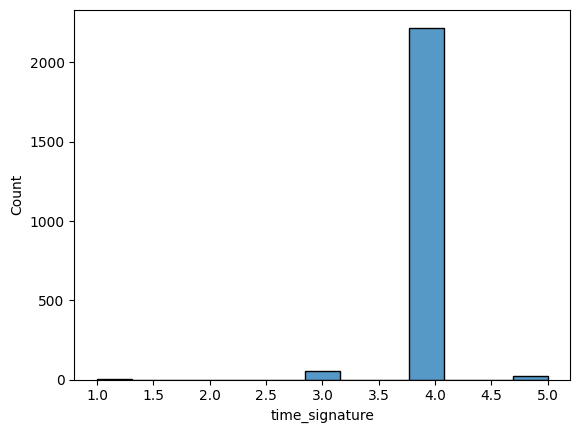

In [120]:
sns.histplot(tidy_playlist['time_signature'])

<Axes: >

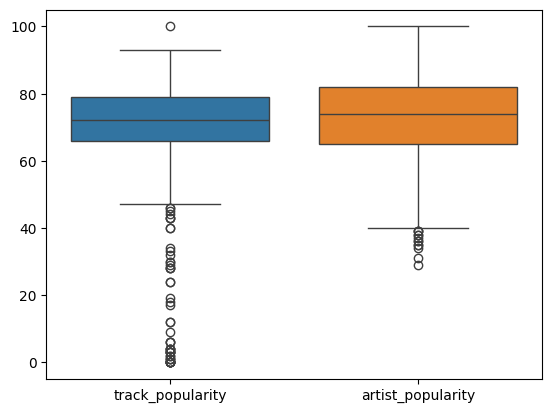

In [122]:
sns.boxplot(data=playlist_data[['track_popularity','artist_popularity']])

<Axes: >

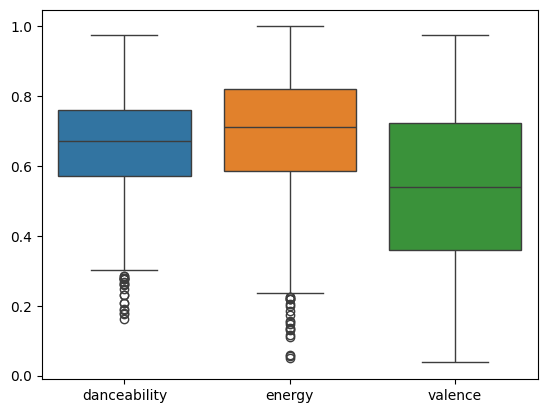

In [123]:
sns.boxplot(data=playlist_data[['danceability','energy','valence',]])

<Axes: xlabel='artist_popularity', ylabel='Count'>

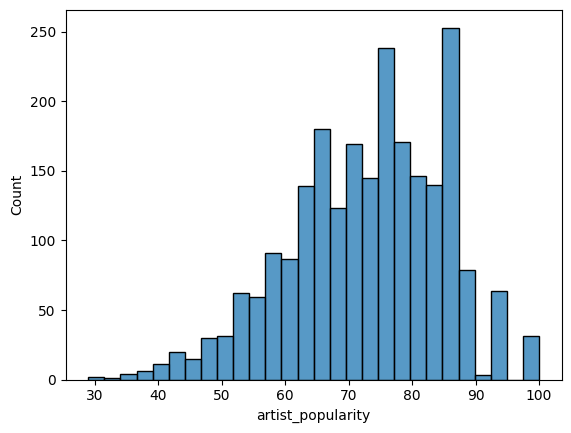

In [124]:
sns.histplot(data=playlist_data,x='artist_popularity')

In [125]:
playlist_corr = tidy_playlist.corr()

<Axes: >

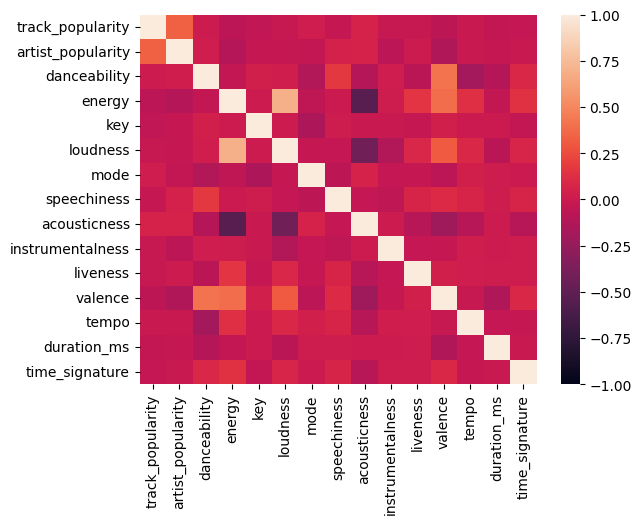

In [126]:
sns.heatmap(playlist_corr,vmin=-1,vmax=1)

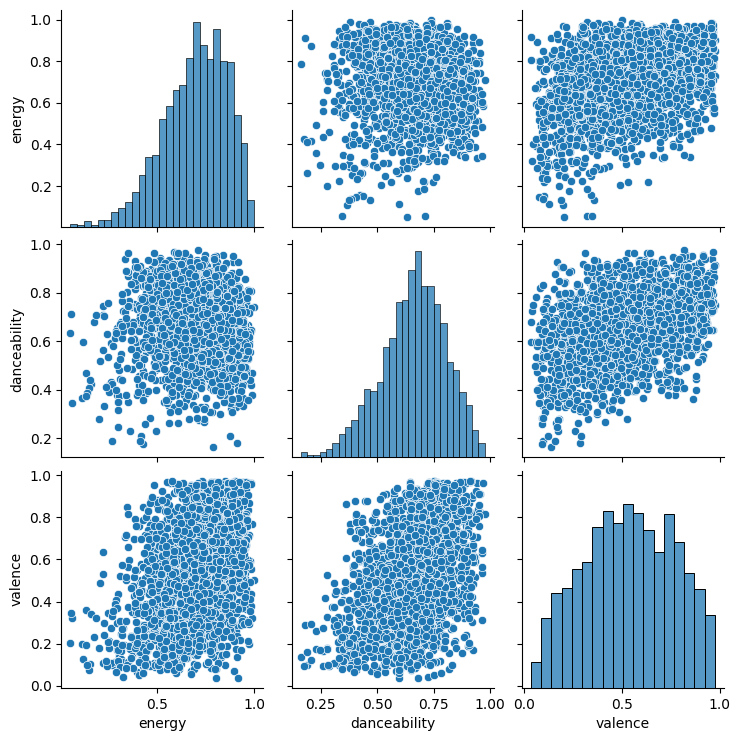

In [127]:
sns.pairplot(data = tidy_playlist[['energy','danceability','valence']])

## PCA

In [128]:
music_data = playlist_data.drop(columns=['artist_popularity','track_popularity','year','track_id','playlist_url','track_name','album','artist_id','artist_name','artist_genres'])

In [129]:
X = music_data.dropna().values

In [130]:
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [131]:
np.mean(X, axis=0), np.var(X, axis=0)

(array([ 6.60115702e-01,  6.93046933e-01,  5.27794693e+00, -5.78404002e+00,
         5.98521096e-01,  9.77953893e-02,  1.57689162e-01,  1.37662920e-02,
         1.72618269e-01,  5.35110048e-01,  1.20512450e+02,  2.26033494e+05,
         3.98216616e+00]),
 array([1.99108922e-02, 2.71597732e-02, 1.31602401e+01, 4.32806622e+00,
        2.40293594e-01, 8.54234860e-03, 4.15342790e-02, 7.05124820e-03,
        1.73162144e-02, 5.18796386e-02, 7.62407204e+02, 1.76858344e+09,
        4.79638158e-02]))

In [132]:
np.mean(X_scaled, axis=0), np.var(X_scaled, axis=0)

(array([ 2.10164881e-16,  9.89011202e-17,  1.54533000e-17,  6.18132002e-18,
         3.94059151e-17, -1.01991780e-16,  3.70879201e-17,  9.27198002e-18,
         8.34478202e-17, -1.23626400e-16, -3.67788541e-16,  9.89011202e-17,
         8.42204852e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [133]:
pca = PCA().fit(X_scaled)

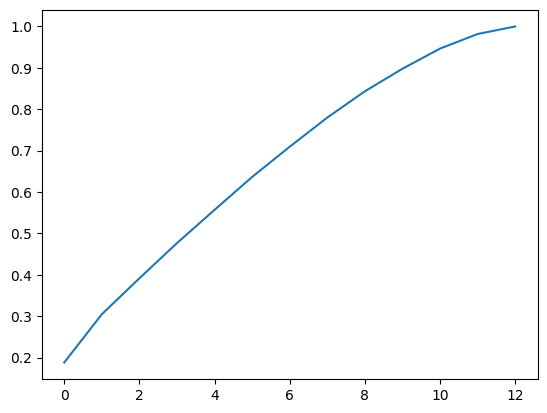

In [134]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [135]:
transformer = FactorAnalysis(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X_scaled)
X_transformed.shape

(2299, 2)

In [136]:
X_transformed

array([[ 0.1784462 ,  1.62300064],
       [-1.24286303,  1.46535059],
       [ 1.18310254,  0.97298394],
       ...,
       [ 0.70702594, -1.75054375],
       [ 1.53166359, -0.70260839],
       [ 0.16638622,  1.88427536]])

<Axes: >

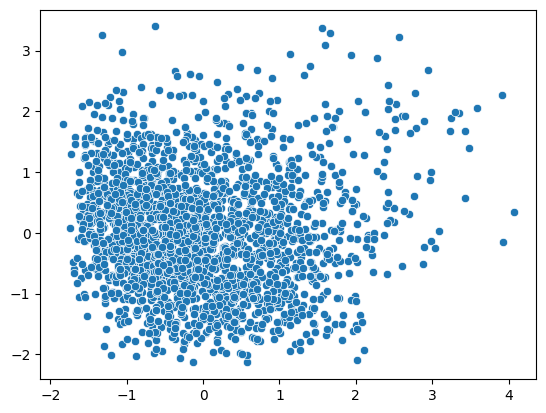

In [137]:
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1])

## Clustering artists

In [138]:
# drop same songs that appear multiple times and drop object type columns
playlist_artist = playlist_data.drop_duplicates(subset=['track_id']).drop(columns = ['year','track_id','playlist_url','track_name','album','artist_id','artist_genres','time_signature']).dropna()

In [139]:
mean_artist_data = playlist_artist.groupby(by = 'artist_name').mean()
mean_artist_data

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
artist_name,,,,,,,,,,,,,,
*NSYNC,64.2,65.0,0.6496,0.7208,4.2,-5.9176,0.2,0.06038,0.188280,0.000243,0.07690,0.7196,142.302,244637.4
112,62.0,64.0,0.6685,0.6150,2.5,-5.3980,0.5,0.18745,0.006685,0.000004,0.06340,0.5005,150.925,229013.0
2 Chainz,72.0,73.0,0.5630,0.9020,1.0,-4.5860,0.0,0.40200,0.054500,0.000000,0.05240,0.5590,171.999,227907.0
21 Savage,80.5,88.0,0.8605,0.4915,4.5,-7.9350,0.5,0.21800,0.027250,0.000629,0.21455,0.3250,110.494,254465.5
24kGoldn,44.5,70.0,0.7005,0.7190,7.0,-3.6145,0.0,0.03650,0.197500,0.000000,0.29800,0.7440,90.998,140529.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
girl in red,86.0,72.0,0.5660,0.3660,7.0,-12.8080,1.0,0.02800,0.113000,0.181000,0.15500,0.2370,129.960,184154.0
iann dior,69.5,70.0,0.6535,0.6720,10.0,-5.9240,1.0,0.03410,0.087550,0.000000,0.10685,0.2590,87.734,133890.5
iio,59.0,41.0,0.6610,0.8550,8.0,-8.4030,1.0,0.03770,0.072200,0.018500,0.19900,0.6010,123.943,253587.0


In [140]:
scaled_artist_data = pd.DataFrame(scale(mean_artist_data),columns=mean_artist_data.columns,index=mean_artist_data.index)
scaled_artist_data.drop(columns=['track_popularity','artist_popularity'],inplace=True)

In [141]:
Z = linkage(scaled_artist_data, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[3.32000000e+02 5.27000000e+02 6.04522057e-01 2.00000000e+00]
 [2.20000000e+02 4.22000000e+02 6.71358623e-01 2.00000000e+00]
 [1.40000000e+02 4.34000000e+02 7.61723080e-01 2.00000000e+00]
 ...
 [1.77400000e+03 1.77700000e+03 3.47602672e+01 8.29000000e+02]
 [1.76200000e+03 1.76800000e+03 3.79564932e+01 6.20000000e+01]
 [1.77800000e+03 1.77900000e+03 4.16568177e+01 8.91000000e+02]]


## pick the 20 most popular artists

In [142]:
sorted_artists = mean_artist_data.sort_values(by='artist_popularity',ascending=False)

In [143]:
best_artists = sorted_artists.iloc[:20]
best_artists

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
artist_name,,,,,,,,,,,,,,
Taylor Swift,79.133333,100.0,0.615033,0.635500,5.466667,-6.947467,0.833333,0.071787,0.208693,0.000524,0.137553,0.442983,117.033067,235368.166667
Drake,77.800000,94.0,0.715233,0.589133,4.933333,-7.398433,0.566667,0.167583,0.106455,0.004127,0.155083,0.431117,121.287067,237591.900000
The Weeknd,79.466667,94.0,0.641933,0.709867,3.333333,-5.577733,0.466667,0.068740,0.109959,0.000435,0.140247,0.524533,127.206667,229614.666667
Bad Bunny,83.363636,94.0,0.727909,0.653636,3.636364,-6.028455,0.363636,0.151982,0.208745,0.000084,0.159900,0.307091,111.797091,227517.545455
Travis Scott,82.800000,93.0,0.749800,0.607800,6.800000,-5.348800,0.800000,0.076820,0.041040,0.000031,0.144200,0.252100,126.706800,237125.600000
KAROL G,77.666667,90.0,0.845333,0.632333,1.333333,-5.148000,0.666667,0.168033,0.387667,0.002952,0.090133,0.647333,125.332667,196702.333333
Lana Del Rey,73.571429,89.0,0.487000,0.583143,4.142857,-8.349857,0.142857,0.040243,0.343386,0.002001,0.196771,0.250971,114.941000,256574.857143
Post Malone,82.692308,89.0,0.686154,0.624615,5.461538,-5.464231,0.692308,0.070662,0.237108,0.000194,0.120362,0.422923,125.385846,202986.769231
Kanye West,73.588235,89.0,0.636118,0.696118,4.117647,-6.237235,0.529412,0.207994,0.095181,0.029422,0.259729,0.450529,101.252529,240714.529412


In [144]:
# drop popularity data, which doesn't regard music
best_artists.drop(columns=['artist_popularity','track_popularity'], inplace = True)
scaled_best_artist_data = pd.DataFrame(scale(best_artists),columns=best_artists.columns,index=best_artists.index)

<ipython-input-144-97fe01780af4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_artists.drop(columns=['artist_popularity','track_popularity'], inplace = True)


In [145]:
Z = linkage(scaled_best_artist_data, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[13.         18.          1.4969529   2.        ]
 [ 2.         16.          1.82464914  2.        ]
 [ 7.         20.          1.89442195  3.        ]
 [ 0.         19.          2.02378147  2.        ]
 [ 1.          3.          2.12791529  2.        ]
 [21.         22.          2.79764524  5.        ]
 [ 8.         24.          3.1653751   3.        ]
 [23.         25.          3.48419042  7.        ]
 [10.         26.          3.66770757  4.        ]
 [ 5.         14.          4.00545922  2.        ]
 [ 4.         27.          4.05596117  8.        ]
 [ 6.         15.          4.35315607  2.        ]
 [11.         28.          4.60690741  5.        ]
 [ 9.         32.          5.62019804  6.        ]
 [17.         30.          6.24846194  9.        ]
 [29.         34.          6.92727416 11.        ]
 [31.         33.          7.45098829  8.        ]
 [35.         36.          8.56366657 19.        ]
 [12.         37.          9.93178878 20.        ]]


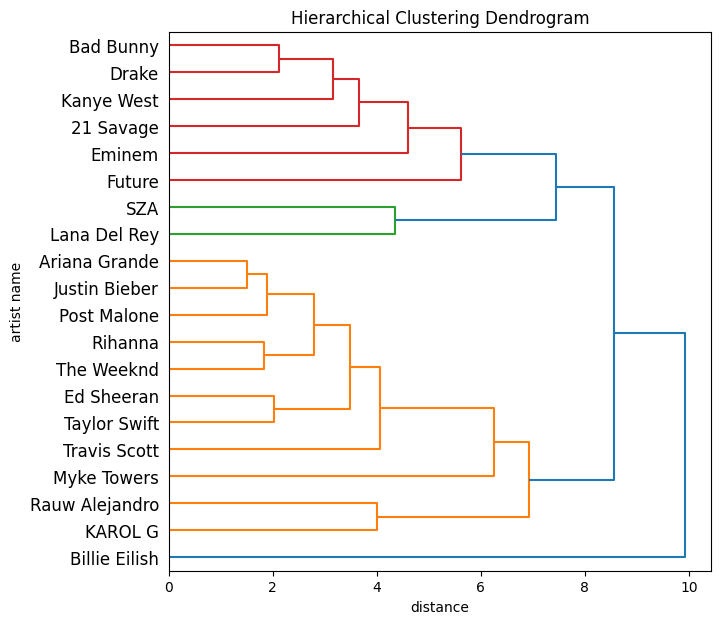

In [146]:
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('artist name')
dendrogram(
    Z = linkage(scaled_best_artist_data, 'ward'),labels = scaled_best_artist_data.index, orientation='right'
)
plt.show()